In [47]:
# Scenario-Based Advanced Internship Assignment

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Setup
sns.set(style='whitegrid')
%matplotlib inline

# Load data
df = pd.read_csv('Downloads/big_mart_sales.csv')  # adjust path if needed
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


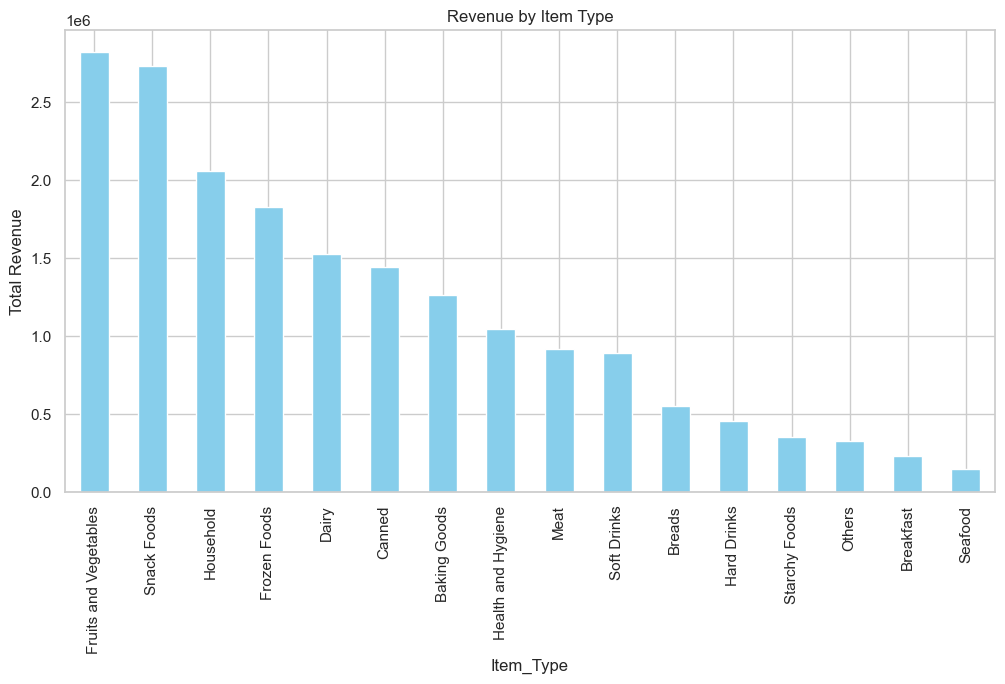

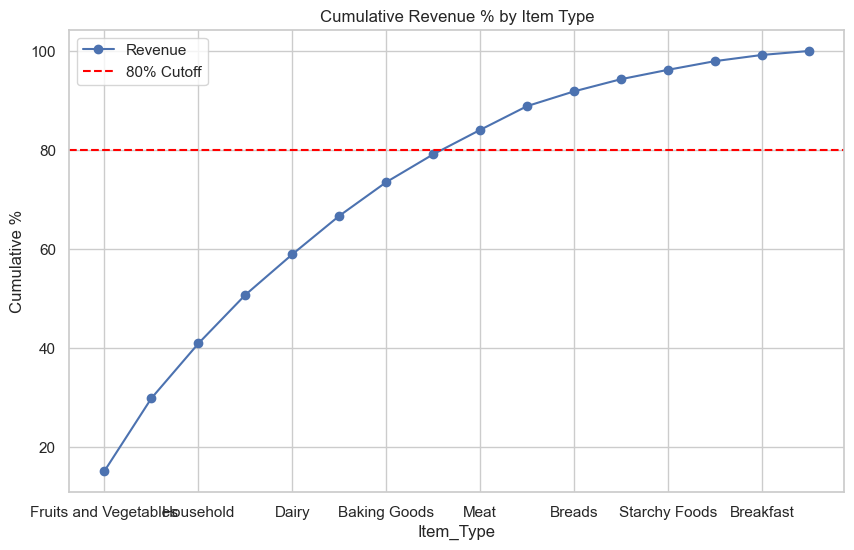

High MRP but Low Sales Items: (270, 13)


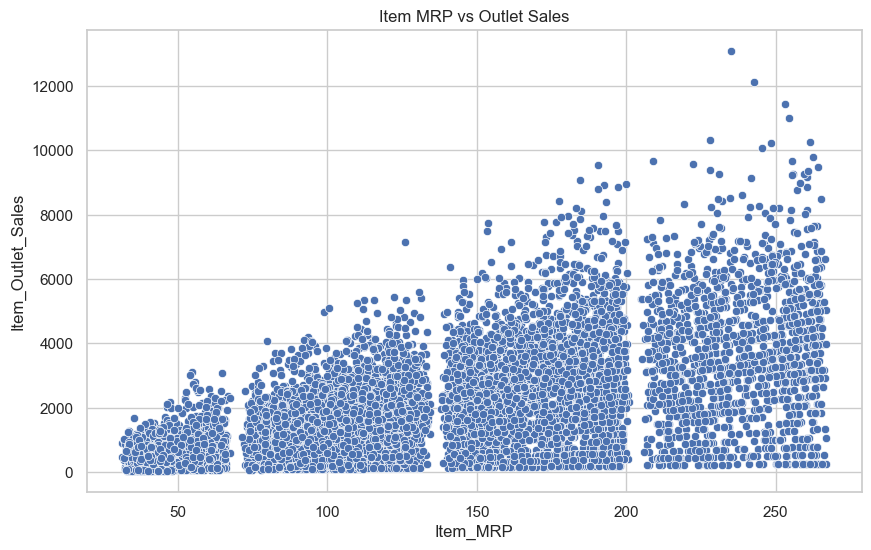

In [49]:
# Scenario 1: Product Performance Analysis
# Total revenue by Item_Type
df['Revenue'] = df['Item_Outlet_Sales']
item_revenue = df.groupby('Item_Type')['Revenue'].sum().sort_values(ascending=False)

# Cumulative revenue %
cumulative_revenue = item_revenue.cumsum() / item_revenue.sum() * 100

# Plot top contributors
item_revenue.plot(kind='bar', figsize=(12,6), color='skyblue')
plt.title('Revenue by Item Type')
plt.ylabel('Total Revenue')
plt.show()

cumulative_revenue.plot(kind='line', marker='o')
plt.title('Cumulative Revenue % by Item Type')
plt.ylabel('Cumulative %')
plt.axhline(80, color='red', linestyle='--', label='80% Cutoff')
plt.legend()
plt.show()

# High MRP but Low Sales
high_price_low_sales = df[(df['Item_MRP'] > df['Item_MRP'].quantile(0.75)) & 
                          (df['Item_Outlet_Sales'] < df['Item_Outlet_Sales'].quantile(0.25))]
print("High MRP but Low Sales Items:", high_price_low_sales.shape)

# Visualize underperformers
sns.scatterplot(x='Item_MRP', y='Item_Outlet_Sales', data=df)
plt.title('Item MRP vs Outlet Sales')
plt.show()


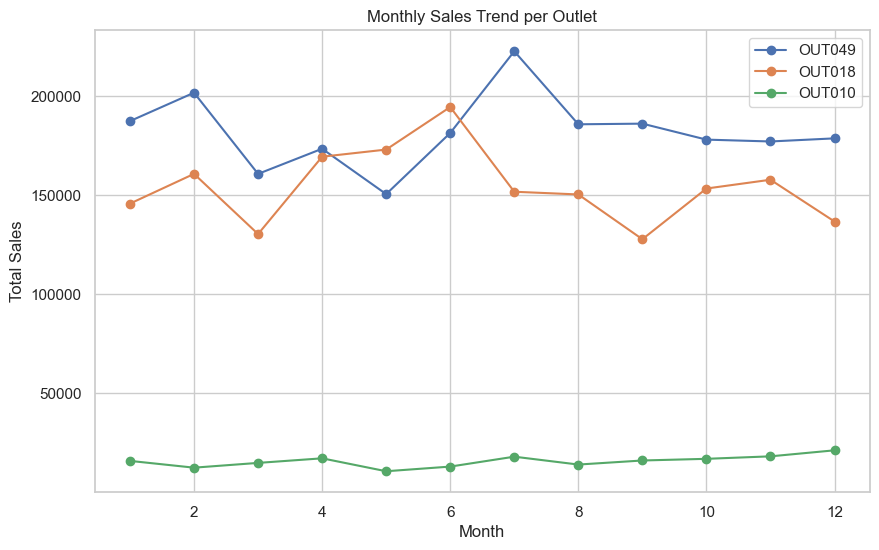

In [51]:
# Scenario 2: Seasonal Outlet Insights
# Simulate random months (1-12)
np.random.seed(0)
df['Month'] = np.random.randint(1, 13, size=len(df))

# Group by outlet and month
monthly_sales = df.groupby(['Outlet_Identifier', 'Month'])['Item_Outlet_Sales'].sum().reset_index()

# Plot sales trends for a few outlets
outlets_to_plot = df['Outlet_Identifier'].unique()[:3]
for outlet in outlets_to_plot:
    subset = monthly_sales[monthly_sales['Outlet_Identifier'] == outlet]
    plt.plot(subset['Month'], subset['Item_Outlet_Sales'], marker='o', label=outlet)

plt.title('Monthly Sales Trend per Outlet')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.legend()
plt.show()

C:\Users\Personal\AppData\Local\Temp\ipykernel_9360\4039429390.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_band_sales = df.groupby('Price_Band')['Item_Outlet_Sales'].sum()


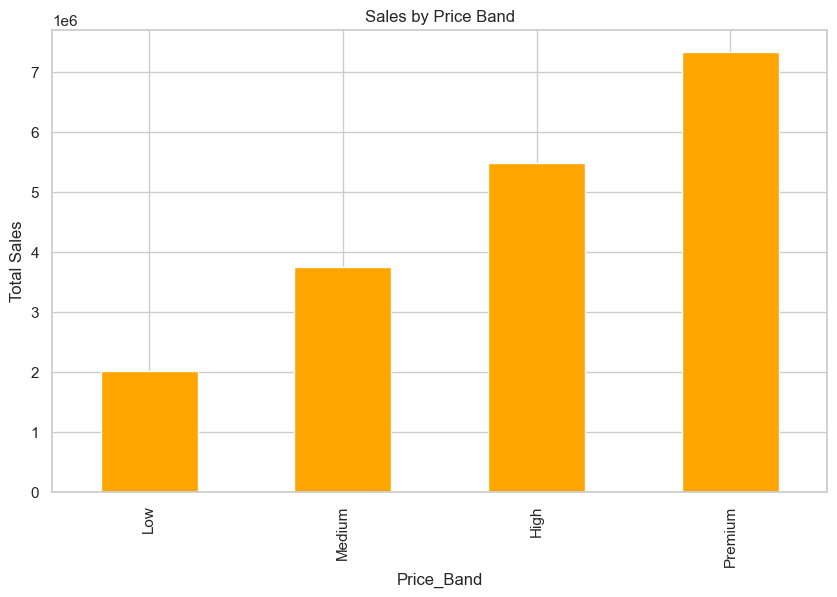

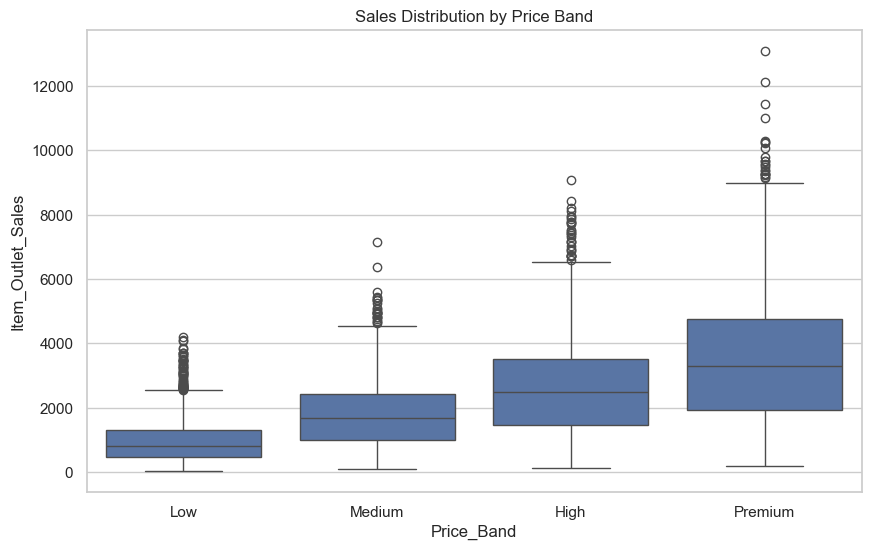

In [53]:
# Scenario 3: Price Band Segmentation
# Segment into price bands using qcut
df['Price_Band'] = pd.qcut(df['Item_MRP'], q=4, labels=['Low', 'Medium', 'High', 'Premium'])

# Sales by price band
price_band_sales = df.groupby('Price_Band')['Item_Outlet_Sales'].sum()
price_band_sales.plot(kind='bar', color='orange')
plt.title('Sales by Price Band')
plt.ylabel('Total Sales')
plt.show()

# Boxplot to show spread
sns.boxplot(x='Price_Band', y='Item_Outlet_Sales', data=df)
plt.title('Sales Distribution by Price Band')
plt.show()

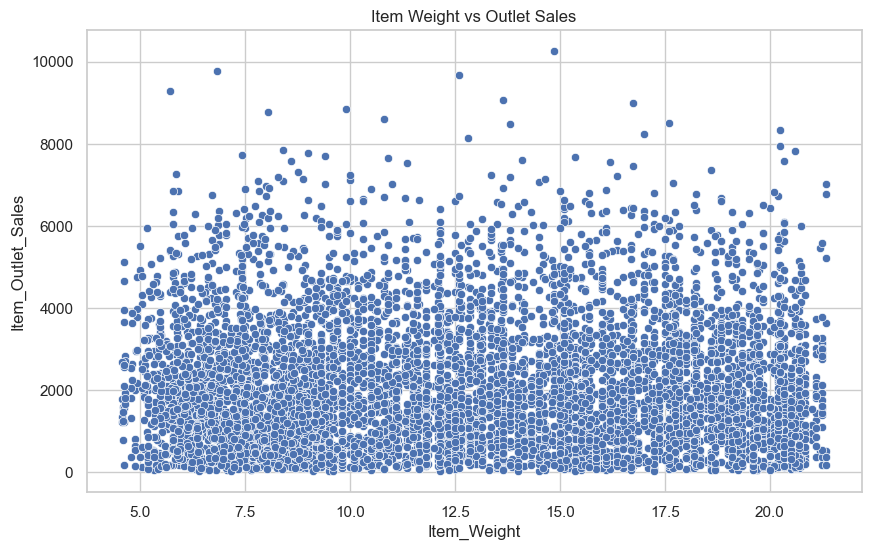

Overstocked but Low Sales Items: (370, 15)


In [55]:
# Scenario 4: Stock Optimization Strategy
# Plot item weight vs sales
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales', data=df)
plt.title('Item Weight vs Outlet Sales')
plt.show()

# Identify overstocked low sellers
threshold_weight = df['Item_Weight'].quantile(0.75)
threshold_sales = df['Item_Outlet_Sales'].quantile(0.25)
overstocked = df[(df['Item_Weight'] >= threshold_weight) & 
                 (df['Item_Outlet_Sales'] <= threshold_sales)]

print("Overstocked but Low Sales Items:", overstocked.shape)

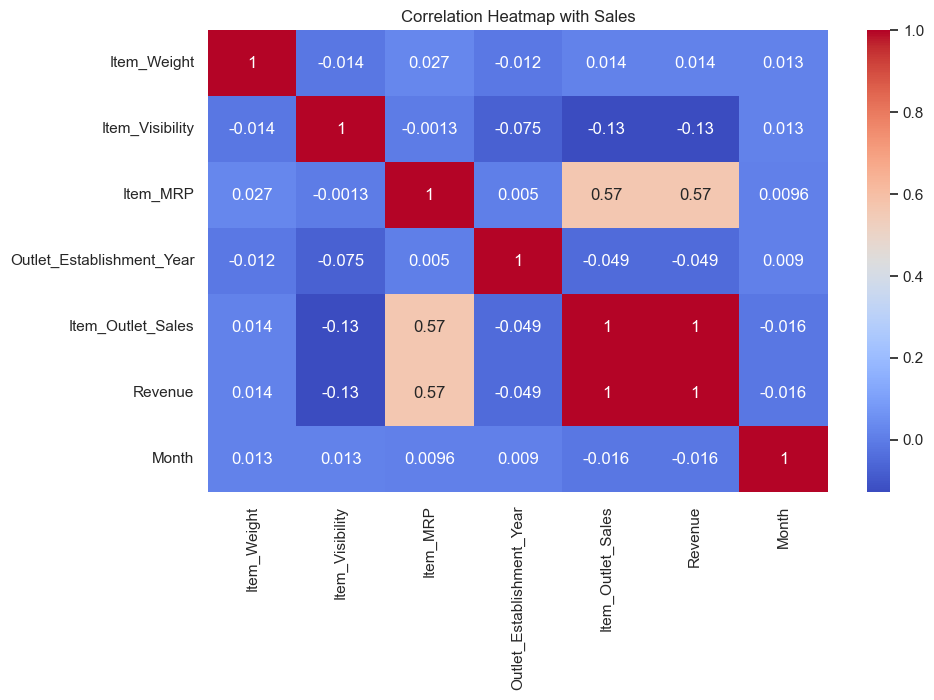

Top 3 features correlated with sales:
 Revenue        1.000000
Item_MRP       0.567574
Item_Weight    0.014123
Name: Item_Outlet_Sales, dtype: float64


In [57]:
# Scenario 5: Correlation with Revenue
# Correlation matrix
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with Sales')
plt.show()

# Top 3 positively correlated with sales
top_corr = corr['Item_Outlet_Sales'].sort_values(ascending=False)[1:4]
print("Top 3 features correlated with sales:\n", top_corr)